In [33]:
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import plotly.express as px
from rapidfuzz import fuzz
from collections import defaultdict

In [34]:
with open("../data/professores.json", encoding="utf-8") as f:
    professores = json.load(f)

In [35]:
def calcular_proximidade(professores):
    resultados = []
    for prof in professores:
        nome = prof["identificacao"]["nome"]
        nomes_citacao = prof["identificacao"].get("nomes_citacao", [])
        for nome_citacao in nomes_citacao:
            score = int(fuzz.token_set_ratio(nome, nome_citacao))
            resultados.append(
                {"nome": nome, "nome_citacao": nome_citacao, "proximidade": score}
            )
    return resultados

In [36]:
resultados = calcular_proximidade(professores)

In [37]:
for r in resultados[: len(resultados)]:
    print(r)

{'nome': 'Adriana Carla Damasceno', 'nome_citacao': 'ADRIANA DAMASCENO', 'proximidade': 15}
{'nome': 'Adriana Carla Damasceno', 'nome_citacao': 'DAMASCENO, ADRIANA', 'proximidade': 14}
{'nome': 'Adriana Carla Damasceno', 'nome_citacao': 'DAMASCENO, ADRIANA C.', 'proximidade': 22}
{'nome': 'Adriana Carla Damasceno', 'nome_citacao': 'DAMASCENO, A. C.', 'proximidade': 25}
{'nome': 'Alan Kelon Oliveira de Moraes', 'nome_citacao': 'MORAES, A. K. O.', 'proximidade': 31}
{'nome': 'Alan Kelon Oliveira de Moraes', 'nome_citacao': 'MORAES, ALAN', 'proximidade': 19}
{'nome': 'Alan Kelon Oliveira de Moraes', 'nome_citacao': 'MORAES, A.', 'proximidade': 20}
{'nome': 'Alisson Vasconcelos de Brito', 'nome_citacao': 'BRITO, ALISSON VASCONCELOS DE', 'proximidade': 17}
{'nome': 'Alisson Vasconcelos de Brito', 'nome_citacao': 'BRITO, ALISSON V.', 'proximidade': 22}
{'nome': 'Alisson Vasconcelos de Brito', 'nome_citacao': 'ALISSON, V.B.', 'proximidade': 14}
{'nome': 'Alisson Vasconcelos de Brito', 'nome_c

In [38]:
nome_professor = "Teobaldo Leite Bulhões Júnior"
dados_prof = [r for r in resultados if r["nome"] == nome_professor]
nomes = [nome_professor] + [d["nome_citacao"] for d in dados_prof]

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(nomes)


pca = PCA(n_components=2)
X_2d = pca.fit_transform(X.toarray())

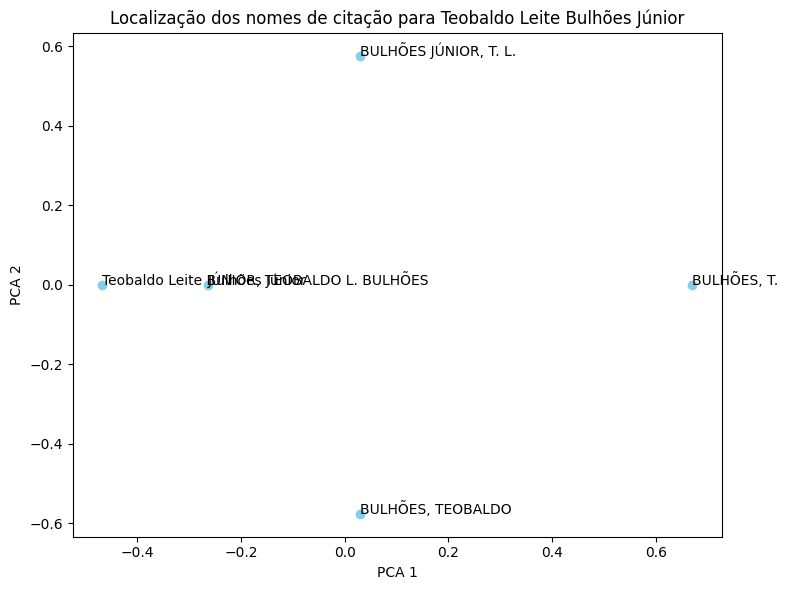

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(X_2d[:, 0], X_2d[:, 1], color="skyblue")
for i, nome in enumerate(nomes):
    plt.text(X_2d[i, 0], X_2d[i, 1], nome, fontsize=10)
plt.title(f"Localização dos nomes de citação para {nome_professor}")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.tight_layout()
plt.show()

In [40]:
grupos = defaultdict(list)
for prof in professores:
    nome = prof["identificacao"]["nome"]
    grupos[nome[0].upper()].append(prof)

for letra, grupo in grupos.items():
    nomes = []
    for prof in grupo:
        nome_professor = prof["identificacao"]["nome"]
        nomes.append(nome_professor)
        nomes += prof["identificacao"].get("nomes_citacao", [])
    if len(nomes) < 2:
        continue

    vectorizer = TfidfVectorizer()
    X = vectorizer.fit_transform(nomes)
    pca = PCA(n_components=2)
    X_2d = pca.fit_transform(X.toarray())

    fig = px.scatter(
        x=X_2d[:, 0],
        y=X_2d[:, 1],
        text=nomes,
        labels={"x": "PCA 1", "y": "PCA 2"},
        title=f"Localização dos nomes de citação - Professores com '{letra}'",
    )
    fig.update_traces(marker=dict(size=10), textposition='top center', hovertemplate='%{text}')
    fig.show()

    print(f"\nProfessores e nomes de citação do grupo '{letra}':")
    idx = 0
    for prof in grupo:
        nome_professor = prof["identificacao"]["nome"]
        print(f"- {nome_professor}  (PCA: {X_2d[idx, 0]:.3f}, {X_2d[idx, 1]:.3f})")
        idx += 1
        nomes_citacao = prof["identificacao"].get("nomes_citacao", [])
        for nome_citacao in nomes_citacao:
            print(f"    • {nome_citacao}  (PCA: {X_2d[idx, 0]:.3f}, {X_2d[idx, 1]:.3f})")
            idx += 1


Professores e nomes de citação do grupo 'A':
- Adriana Carla Damasceno  (PCA: 0.074, 0.001)
    • ADRIANA DAMASCENO  (PCA: 0.081, 0.001)
    • DAMASCENO, ADRIANA  (PCA: 0.081, 0.001)
    • DAMASCENO, ADRIANA C.  (PCA: 0.081, 0.001)
    • DAMASCENO, A. C.  (PCA: 0.073, 0.001)
- Alan Kelon Oliveira de Moraes  (PCA: -0.024, 0.128)
    • MORAES, A. K. O.  (PCA: 0.055, 0.012)
    • MORAES, ALAN  (PCA: 0.052, 0.015)
    • MORAES, A.  (PCA: 0.055, 0.012)
- Alisson Vasconcelos de Brito  (PCA: -0.655, -0.333)
    • BRITO, ALISSON VASCONCELOS DE  (PCA: -0.655, -0.333)
    • BRITO, ALISSON V.  (PCA: -0.572, -0.545)
    • ALISSON, V.B.  (PCA: -0.393, -0.385)
    • BRITO, ALISSON V  (PCA: -0.572, -0.545)
    • BRITO, A. V.  (PCA: -0.393, -0.385)
    • DE BRITO, ALISSON VASCONCELOS  (PCA: -0.655, -0.333)
    • ALISSON VASCONCELOS BRITO  (PCA: -0.609, -0.556)
    • BRITO, ALISSON  (PCA: -0.572, -0.545)
    • VASCONCELOS BRITO, ALISSON  (PCA: -0.609, -0.556)
    • BRITO, ALISSON VASCONCELOS  (PCA: -0


Professores e nomes de citação do grupo 'B':
- Bruno Jefferson de Sousa Pessoa  (PCA: -0.619, -0.409)
    • PESSOA, BRUNO JEFFERSON DE S.  (PCA: -0.591, -0.232)
    • PESSOA, B. J. S.  (PCA: -0.554, 0.667)
    • PESSOA, BRUNO JEFFERSON DE SOUSA  (PCA: -0.619, -0.409)
    • PESSOA, BRUNO J.S.  (PCA: -0.398, 0.511)
- Bruno Petrato Bruck  (PCA: 0.539, -0.021)
    • BRUCK, B.P.  (PCA: 0.620, -0.015)
    • BRUCK, BRUNO  (PCA: 0.542, -0.036)
    • BRUCK, BRUNO P.  (PCA: 0.542, -0.036)
    • BRUCK, BRUNO PETRATO  (PCA: 0.539, -0.021)



Professores e nomes de citação do grupo 'C':
- Camila Mara Vital Barros  (PCA: -0.202, 0.819)
    • BARROS, C. M. V.  (PCA: -0.169, 0.598)
    • BARROS, CAMILA MARA VITAL  (PCA: -0.202, 0.819)
    • MARA VITAL BARROS, CAMILA  (PCA: -0.202, 0.819)
    • BARROS, CAMILA  (PCA: -0.188, 0.721)
- Carlos Alberto Nunes Machado  (PCA: -0.278, 0.032)
    • MACHADO, C. A. N.  (PCA: -0.148, 0.150)
    • MACHADO, CARLOS ALBERTO NUNES  (PCA: -0.278, 0.032)
- Carlos Eduardo Coelho Freire Batista  (PCA: -0.592, -0.425)
    • BATISTA, CARLOS EDUARDO FREIRE  (PCA: -0.599, -0.427)
    • BATISTA, CARLOS  (PCA: -0.566, -0.373)
    • BATISTA, C. E. C. F.  (PCA: -0.450, -0.270)
    • BATISTA, CARLOS E. C. F.  (PCA: -0.566, -0.373)
    • BATISTA, CARLOS EDUARDO COELHO FREIRE  (PCA: -0.592, -0.425)
    • EDUARDO COELHO FREIRE BATISTA, CARLOS  (PCA: -0.592, -0.425)
    • BATISTA, CARLOS EDUARDO  (PCA: -0.591, -0.411)
- Christian Azambuja Pagot  (PCA: -0.129, 0.223)
    • PAGOT, CHRISTIAN  (PCA: -0.132, 0.231)



Professores e nomes de citação do grupo 'D':
- Daniela Coelho Batista Guedes Pereira  (PCA: -0.692, -0.380)
    • BATISTA, D. C. F  (PCA: -0.567, -0.253)
    • DANIELA C. B. G. PEREIRA  (PCA: -0.540, -0.210)
    • DANIELA COELHO BATISTA  (PCA: -0.720, -0.418)
    • DANIELA COELHO FREIRE BATISTA  (PCA: -0.673, -0.372)
- Danielle Rousy Dias Ricarte  (PCA: 0.550, -0.055)
    • RICARTE, DANIELLE ROUSY D.  (PCA: 0.525, -0.106)
    • ROUSY DIAS DA SILVA, DANIELLE  (PCA: 0.128, 0.470)
    • SILVA, DANIELLE  (PCA: -0.070, 0.628)
    • RICARTE, DANIELLE ROUSY DIAS  (PCA: 0.550, -0.055)
    • RICARTE, DANIELLE R. D.  (PCA: 0.424, -0.133)
    • SILVA, D. R. D.  (PCA: -0.299, 0.685)
    • RICARTE, D. R. D  (PCA: 0.294, -0.296)
    • DANIELLE ROUSY D. RICARTE  (PCA: 0.525, -0.106)
    • ROUSY DIAS RICARTE, DANIELLE  (PCA: 0.550, -0.055)
    • RICARTE, D. R. D.  (PCA: 0.294, -0.296)
    • DANIELLE ROUSY DIAS RICARTE  (PCA: 0.550, -0.055)
- Derzu Omaia  (PCA: -0.414, 0.505)
    • OMAIA, DERZU  (PCA:


Professores e nomes de citação do grupo 'E':
- Ed Porto Bezerra  (PCA: 0.554, -0.184)
    • ED PORTO BEZERRA  (PCA: 0.554, -0.184)
    • BEZERRA, ED  (PCA: 0.491, 0.080)
    • ED BEZERRA  (PCA: 0.491, 0.080)
    • ED PORTO  (PCA: 0.392, -0.321)
    • PORTO, ED  (PCA: 0.392, -0.321)
    • BEZERRA, E. P.  (PCA: 0.292, 0.292)
    • BEZERRA ED  (PCA: 0.491, 0.080)
    • BEZERRA, ED PORTO  (PCA: 0.554, -0.184)
- Elizabet Maria Spohr de Medeiros  (PCA: -0.237, 0.797)
    • MEDEIROS, E. M. S.  (PCA: -0.237, 0.797)
- Eudisley Gomes dos Anjos  (PCA: -0.805, -0.248)
    • ANJOS, EUDISLEY GOMES DOS  (PCA: -0.805, -0.248)
    • GOMES DOS ANJOS, EUDISLEY  (PCA: -0.805, -0.248)
    • ANJOS, E. G.  (PCA: -0.605, -0.044)
    • ANJOS, EUDISLEY  (PCA: -0.716, -0.145)



Professores e nomes de citação do grupo 'F':
- Felipe Antonio Garcia Moreno  (PCA: 0.425, 0.470)
    • MORENO, F. A. G.  (PCA: 0.361, -0.622)
    • MORENO, FELIPE A. G.  (PCA: 0.470, -0.161)
    • MORENO, FELIPE GARCIA  (PCA: 0.482, 0.275)
- Francisco de Assis Coutinho Souto  (PCA: -0.869, 0.019)
    • SOUTO, FRANCISCO DE ASSIS COUTINHO  (PCA: -0.869, 0.019)



Professores e nomes de citação do grupo 'G':
- Gilberto Farias de Sousa Filho  (PCA: 0.810, 0.006)
    • SOUSA FILHO, GILBERTO F.  (PCA: 0.786, 0.051)
    • DE SOUSA FILHO, GILBERTO FARIAS  (PCA: 0.810, 0.006)
    • SOUSA FILHO, G. F.  (PCA: 0.663, 0.052)
    • DE SOUSA, GILBERTO F.  (PCA: 0.657, -0.016)
    • SOUSA FILHO, GILBERTO FARIAS DE  (PCA: 0.810, 0.006)
    • FILHO, GILBERTO FARIAS DE SOUSA  (PCA: 0.810, 0.006)
    • DE SOUSA FILHO, GILBERTO F.  (PCA: 0.787, -0.001)
- Giorgia de Oliveira Mattos  (PCA: -0.116, -0.589)
    • O. MATTOS, GIORGIA  (PCA: -0.028, -0.436)
    • MATTOS, GIORGIA  (PCA: -0.028, -0.436)
    • MATTOS, GIORGIA DE OLIVEIRA  (PCA: -0.116, -0.589)
    • OLIVEIRA MATTOS, GIORGIA  (PCA: -0.209, -0.596)
    • MATTOS, GIORGIA O.  (PCA: -0.028, -0.436)
- Glêdson Elias da Silveira  (PCA: 0.055, 0.049)
    • ELIAS, G.  (PCA: 0.058, 0.053)
    • ELIAS, GLEDSON  (PCA: 0.057, 0.051)
- Gustavo Charles Peixoto de Oliveira  (PCA: -0.305, -0.117)
    • OLIVEIRA, G.  (PCA: 


Professores e nomes de citação do grupo 'J':
- José Miguel Aroztegui Massera  (PCA: 0.493, -0.295)
    • AROZTEGUI, M.  (PCA: -0.625, -0.262)
    • AROZTEGUI, MIGUEL  (PCA: -0.161, 0.401)
    • AROZTEGUI, JOSÉ MIGUEL  (PCA: 0.293, 0.157)



Professores e nomes de citação do grupo 'K':
- Kely Diana Villacorta Villacorta  (PCA: 0.256, -0.200)
    • VILLACORTA, K. D. V.  (PCA: -0.487, -0.416)
    • VILLACORTA, KELY DIANA  (PCA: 0.524, -0.092)
    • VILLACORTA, KELY D. V.  (PCA: -0.146, 0.354)
    • VILLACORTA, KELY D.V.  (PCA: -0.146, 0.354)



Professores e nomes de citação do grupo 'L':
- Leandro Carlos de Souza  (PCA: -0.131, -0.283)
    • CARLOS DE SOUZA, LEANDRO  (PCA: -0.131, -0.283)
    • DE SOUZA, LEANDRO CARLOS  (PCA: -0.131, -0.283)
    • DE SOUZA, LEANDRO C.  (PCA: -0.126, -0.271)
    • SOUZA, LEANDRO  (PCA: -0.122, -0.263)
    • SOUZA, LEANDRO CARLOS DE  (PCA: -0.131, -0.283)
    • SOUZA, LEANDRO CARLOS  (PCA: -0.126, -0.271)
    • SOUZA, L.C.  (PCA: -0.101, -0.216)
    • SOUZA, LEANDRO C.  (PCA: -0.122, -0.263)
- Liliane dos Santos Machado  (PCA: 0.713, 0.142)
    • LILIANE DOS SANTOS MACHADO  (PCA: 0.713, 0.142)
    • DOS SANTOS MACHADO, LILIANE  (PCA: 0.713, 0.142)
    • MACHADO, LILIANEDOS SANTOS  (PCA: 0.347, -0.028)
    • MACHADO, LILIANE S.  (PCA: 0.790, 0.024)
    • MACHADO, LILIANE DOS SANTOS  (PCA: 0.713, 0.142)
    • LILIANE S. MACHADO  (PCA: 0.790, 0.024)
    • LILIANE DOS S. MACHADO  (PCA: 0.724, 0.171)
    • MACHADO, LILIANE  (PCA: 0.790, 0.024)
    • DOS S. MACHADO, LILIANE  (PCA: 0.724, 0.171)
   


Professores e nomes de citação do grupo 'M':
- Marcelo Iury de Sousa Oliveira  (PCA: -0.910, 0.022)
    • OLIVEIRA, MARCELO IURY S.  (PCA: -0.828, 0.018)
    • OLIVEIRA, MARCELO IURY DE SOUSA  (PCA: -0.910, 0.022)
- Moises Dantas dos Santos  (PCA: 0.287, -0.514)
    • SANTOS, M. D  (PCA: 0.362, 0.577)
    • SANTOS, MOISÉS DANTAS DOS  (PCA: 0.352, -0.441)
    • SANTOS, M.D.  (PCA: 0.362, 0.577)
    • SANTOS, M. D.  (PCA: 0.362, 0.577)
    • DOS SANTOS, MOISÉS DANTAS  (PCA: 0.352, -0.441)
    • MOISES DANTAS DOS SANTOS  (PCA: 0.287, -0.514)
    • SANTOS, MOISÉS D.  (PCA: 0.286, 0.116)



Professores e nomes de citação do grupo 'N':
- Natasha Correia Queiroz Lino  (PCA: 0.716, 0.022)
    • LINO, NATASHA C.Q.  (PCA: -0.300, 0.155)
    • LINO, N. C. Q.  (PCA: -0.232, -0.665)
    • LINO, NATASHA C Q  (PCA: -0.300, 0.155)
    • LINO, NATASHA C. Q.  (PCA: -0.300, 0.155)
    • LINO, NATASHA CORREIA QUEIROZ  (PCA: 0.716, 0.022)
    • LINO, NATASHA  (PCA: -0.300, 0.155)



Professores e nomes de citação do grupo 'R':
- Raoni Kulesza  (PCA: -0.511, -0.618)
    • ABÁSOLO, MARÍA JOSÉ, KULESZA, RAONI  (PCA: -0.617, 0.204)
    • ABÁSOLO, M. J.  (PCA: -0.340, 0.623)
    • MARÍA JOSÉ ABÁSOLO, RAONI KULESZA  (PCA: -0.617, 0.204)
    • MARÍA JOSÉ ABÁSOLO  (PCA: -0.411, 0.708)
    • KULESZA, R.  (PCA: -0.440, -0.523)
    • KULESZA, RAONI  (PCA: -0.511, -0.618)
    • ABÁSOLO, M. J., KULESZA, R.  (PCA: -0.533, 0.096)
- Roberto Quirino do Nascimento  (PCA: 0.729, -0.017)
    • NASCIMENTO, ROBERTO QUIRINO  (PCA: 0.660, -0.012)
    • QUIRINO DO NASCIMENTO, ROBERTO  (PCA: 0.729, -0.017)
    • NASCIMENTO, ROBERTO QUIRINO DO  (PCA: 0.729, -0.017)
    • DO NASCIMENTO, ROBERTO QUIRINO  (PCA: 0.729, -0.017)
    • NASCIMENTO, R. Q.  (PCA: 0.402, 0.004)



Professores e nomes de citação do grupo 'S':
- Sérgio de Carvalho Bezerra  (PCA: 0.125, 0.075)
    • BEZERRA, SÉRGIO C.  (PCA: -0.598, 0.302)
    • S.C.BEZERRA  (PCA: -0.535, -0.314)
    • S. DE CARVALHO  (PCA: 0.730, -0.186)
    • SÉRGIO DE CARVALHO BEZERRA  (PCA: 0.125, 0.075)
    • S. CARVALHO  (PCA: 0.710, 0.342)
    • DE CARVALHO BEZERRA, SÉRGIO  (PCA: 0.125, 0.075)
    • BEZERRA, SÉRGIO  (PCA: -0.598, 0.302)
    • BEZERRA,S. DE C  (PCA: -0.085, -0.669)



Professores e nomes de citação do grupo 'T':
- Tatiana Araújo Simões  (PCA: 0.025, 0.291)
    • SIMÕES, T.A.  (PCA: -0.128, 0.322)
    • SIMÕES, TATIANA A.  (PCA: -0.127, 0.342)
    • SIMOES, T. A.  (PCA: -0.121, 0.208)
- Teobaldo Leite Bulhões Júnior  (PCA: -0.163, 0.714)
    • JÚNIOR, TEOBALDO L. BULHÕES  (PCA: -0.169, 0.777)
    • BULHÕES, T.  (PCA: -0.159, 0.665)
    • BULHÕES JÚNIOR, T. L.  (PCA: -0.163, 0.713)
    • BULHÕES, TEOBALDO  (PCA: -0.163, 0.713)
- Thaís Gaudencio do Rêgo  (PCA: -0.602, -0.461)
    • REGO, THAIS  (PCA: -0.364, 0.239)
    • GAUDENCIO, THAÍS  (PCA: -0.406, -0.263)
    • RÊGO, THAIS GAUDENCIO DO  (PCA: -0.581, -0.256)
    • G. DO RÊGO, THAÍS  (PCA: -0.585, -0.428)
    • REGO, THAIS G. DO  (PCA: -0.481, 0.105)
    • DO RÃªGO, THAÃ­S G  (PCA: -0.268, 0.103)
    • DO REGO, TG  (PCA: -0.331, 0.116)
    • DO REGO, THAIS G.  (PCA: -0.481, 0.105)
    • DO RÊGO, THAÍS GAUDENCIO  (PCA: -0.602, -0.461)
    • RÊGO, THAIS G.  (PCA: -0.447, -0.076)
    • RÊGO, THAÍS GA


Professores e nomes de citação do grupo 'V':
- Vitor Meneghetti Ugulino de Araujo  (PCA: -0.169, -0.327)
    • ARAUJO, V. M. U.  (PCA: 0.789, 0.105)
    • ARAÚJO, VITOR MENEGHETTI UGULINO DE  (PCA: -0.620, 0.223)



Professores e nomes de citação do grupo 'Y':
- Yuri de Almeida Malheiros Barbosa  (PCA: 0.669, 0.023)
    • MALHEIROS, YURI  (PCA: 0.770, -0.058)
    • MALHEIROS, YURI B  (PCA: 0.770, -0.058)
    • MALHEIROS, Y.  (PCA: 0.657, -0.058)
    • MALHEIROS, Y  (PCA: 0.657, -0.058)
    • MALHEIROS, YURI B.  (PCA: 0.770, -0.058)
    • BARBOSA, Y. A. M.  (PCA: 0.295, 0.081)
    • ALMEIDA, YURI A.  (PCA: 0.509, 0.026)
    • BARBOSA, YURI DE ALMEIDA MALHEIROS  (PCA: 0.669, 0.023)
- Yuska Paola Costa Aguiar  (PCA: -0.561, -0.262)
    • AGUIAR, YUSKA PAOLA COSTA  (PCA: -0.561, -0.262)
    • AGUIAR, YUSKA P. C.  (PCA: -0.445, 0.518)
    • YUSKA PAOLA COSTA AGUIAR  (PCA: -0.561, -0.262)
    • YUSKA PAOLA COSTA  (PCA: -0.432, -0.616)
    • YUSKA P. C. AGUIAR  (PCA: -0.445, 0.518)
    • AGUIAR, YUSKA  (PCA: -0.445, 0.518)
    • AGUIAR, YUSKA PAOLA  (PCA: -0.527, 0.107)
    • YUSKA PAOLA AGUIAR  (PCA: -0.527, 0.107)
    • COSTA AGUIAR, YUSKA PAOLA  (PCA: -0.561, -0.262)
    • COSTA, YUSKA PAOLA  (PCA: -